# Comprensión de los Datos

In [39]:
#importa librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

# Descripción de Variables


Pregnancies  
Glucose  
BloodPressure  
SkinThickness  
Insulin  
BMI  
DiabetesPedigreeFunction  
Age  
Outcome 


**Ejemplo:** Crear un objeto DataFrame con base en un archivo .csv

In [40]:
#lee archivo csv
diabetes = pd.read_csv("diabetes.csv")

In [41]:
#Usa función shape para revisar el total de renglones y columnas
diabetes.shape

(768, 9)

In [42]:
#Revisa los primeros 5 renglones del dataset usando la función head()
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
#Revisa los últimos 5 renglones del dataset usando la función tail()
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [44]:
#Revisa la información mas completa del conjunto de datos usando la función info()
#Muestra el total de datos, las columnas y su tipo correspondiente, dice si contiene nulos o no
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [45]:
#revisa cuántos valores únicos tiene cada atributo del archivo usando la función nunique()
diabetes.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

## Exploración de Datos

In [46]:
#utiliza la función describe() para obtener estadística básica. se puede incluir -0
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [47]:
#Revisa Valores nulos con funcion isnull().sum()
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [48]:
#Revisar valores únicos por columna usando función unique(): nombre-columna.unique()
diabetes.Age.unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

In [49]:
diabetes['Outcome'].unique()

array([1, 0])

## Variables Cuantitativas

### Medidas de tendencia central


In [50]:
#Edad
#Se puede obtener la media, mediana y moda para
mean_age = diabetes['Age'].mean()
median_age =diabetes['Age'].median()
mode_age = diabetes['Age'].mode()
print("Mean_age:",mean_age)
print("Median_age:",median_age)
print("Mode_age:",mode_age)

Mean_age: 33.240885416666664
Median_age: 29.0
Mode_age: 0    22
Name: Age, dtype: int64


Conclusiones:
La edad promedio fue 34
La edad al centro es 31
La edad más repetida fue de 23

# Variables Categóricas

In [51]:
#Para conteo  de cada valor en una columna, en orden descendente usar función value_counts():    
# nombreDataframe.columna.value_counts()
# nombreDataframe['columna'].value_counts()
diabetes.Glucose.value_counts()

Glucose
99     17
100    17
111    14
125    14
129    14
       ..
56      1
169     1
149     1
65      1
190     1
Name: count, Length: 136, dtype: int64

In [52]:
#Revisa conteo de varias columnas
diabetes.Insulin.value_counts()

Insulin
0      374
105     11
130      9
140      9
120      8
      ... 
178      1
127      1
510      1
16       1
112      1
Name: count, Length: 186, dtype: int64

In [53]:
# Crear variable que incluya la suma de dos columnas 
# Mostrar el total 
diabetes['diabetes_posible'] = diabetes['Glucose'] + diabetes['Insulin']+1

In [54]:
diabetes['Age'].value_counts()

Age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
36    16
38    16
32    16
45    15
34    14
46    13
40    13
43    13
39    12
35    10
44     8
50     8
51     8
52     8
58     7
54     6
47     6
49     5
60     5
53     5
57     5
48     5
63     4
66     4
55     4
62     4
59     3
56     3
65     3
67     3
61     2
69     2
72     1
81     1
64     1
70     1
68     1
Name: count, dtype: int64

In [55]:
diabetes.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,diabetes_posible
0,6,148,72,35,0,33.6,0.627,50,1,149


## Consulta

In [56]:
# df.iloc[i]: Accede a la fila en la posición i.
# Acceder a la primera fila
diabetes.iloc[0]

Pregnancies                   6.000
Glucose                     148.000
BloodPressure                72.000
SkinThickness                35.000
Insulin                       0.000
BMI                          33.600
DiabetesPedigreeFunction      0.627
Age                          50.000
Outcome                       1.000
diabetes_posible            149.000
Name: 0, dtype: float64

In [57]:
# Acceder a las dos primeras filas
diabetes.iloc[:2]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,diabetes_posible
0,6,148,72,35,0,33.6,0.627,50,1,149
1,1,85,66,29,0,26.6,0.351,31,0,86


In [58]:
#Seleccionar columnas, indicando entre corchetes [nombreColumna, nombreColumna]
diabetes[['Age', 'Outcome']]

,Age,Outcome
0,50,1
1,31,0
2,32,1
3,21,0
4,33,1
...,...,...
763,63,0
764,27,0
765,30,0
766,47,1


In [59]:
#Selección de filas [indicar dataframe[columna] operador valor]
diabetes_positivo=diabetes[diabetes['Outcome']==1]

In [60]:
diabetes_positivo.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,diabetes_posible
0,6,148,72,35,0,33.6,0.627,50,1,149
2,8,183,64,0,0,23.3,0.672,32,1,184
4,0,137,40,35,168,43.1,2.288,33,1,306
6,3,78,50,32,88,31.0,0.248,26,1,167
8,2,197,70,45,543,30.5,0.158,53,1,741


In [61]:
#ordenar usando funcion sort_values(by=atributo, ascending=True/false)
diabetes_positivo.sort_values(by='Outcome',ascending=False)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,diabetes_posible
0,6,148,72,35,0,33.6,0.627,50,1,149
2,8,183,64,0,0,23.3,0.672,32,1,184
4,0,137,40,35,168,43.1,2.288,33,1,306
6,3,78,50,32,88,31.0,0.248,26,1,167
8,2,197,70,45,543,30.5,0.158,53,1,741
...,...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1,239
757,0,123,72,0,0,36.3,0.258,52,1,124
759,6,190,92,0,0,35.5,0.278,66,1,191
761,9,170,74,31,0,44.0,0.403,43,1,171


In [62]:
#Agrupar por un atributo y calcular función de agregación utilizando groupby(atributo)['atributoAgregacion].funcion() (ej. mean() para promedio)
diabetes.groupby('Outcome')['Age'].mean()

Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64

Crea un subconjunto de **diabetes** 

In [63]:
# usa el criterio para extraer solo ...
diabetes_edad = diabetes.groupby('Outcome')['Age'].mean()

In [64]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,diabetes_posible
0,6,148,72,35,0,33.6,0.627,50,1,149
1,1,85,66,29,0,26.6,0.351,31,0,86
2,8,183,64,0,0,23.3,0.672,32,1,184
3,1,89,66,23,94,28.1,0.167,21,0,184
4,0,137,40,35,168,43.1,2.288,33,1,306


## Visualización de datos

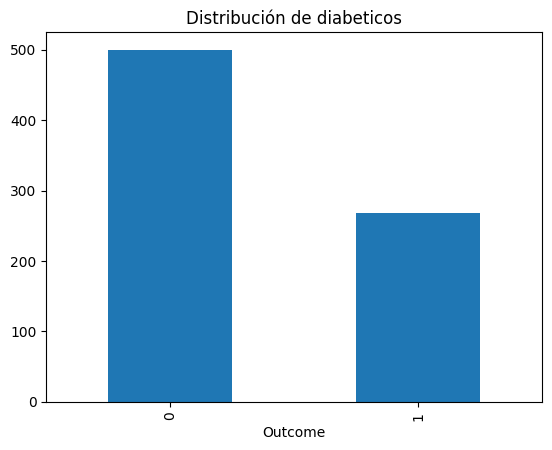

In [65]:
diabetes_total = diabetes['Outcome'].value_counts()
diabetes_total.plot(kind='bar')
plt.title('Distribución de diabeticos')
plt.show()

En el diagrama se representa la distribución total de la población con diabetes (1) y la población sin diabetes (2), siendo clara que la mayoría de los individuos salió negativo a diabetes.

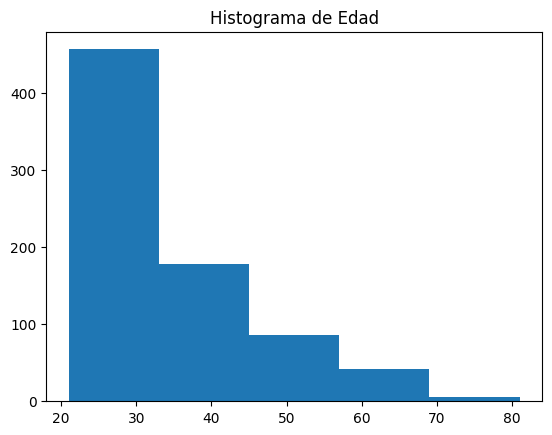

In [66]:
plt.hist(diabetes['Age'], bins=5)
plt.title('Histograma de Edad')
plt.show()

En este diagrama se puede observar que la población estudiada está conformada mayormente por gente en sus veintes y que la minoría son parte de grupos de la tercera edad.

## Boxplot

In [67]:
#Boxplot - revisar sea variable numérica y no tenga nulos
print("Mediana:", diabetes['Age'].median())
print("Media:", diabetes['Age'].mean())
print(diabetes['Age'].dtype)
diabetes["Age"].isnull().sum()

Mediana: 29.0
Media: 33.240885416666664
int64


np.int64(0)

In [68]:
diabetes['Age']=diabetes['Age'].fillna(diabetes['Age'].median())

Text(0.5, 1.0, 'Boxplot de Edad')

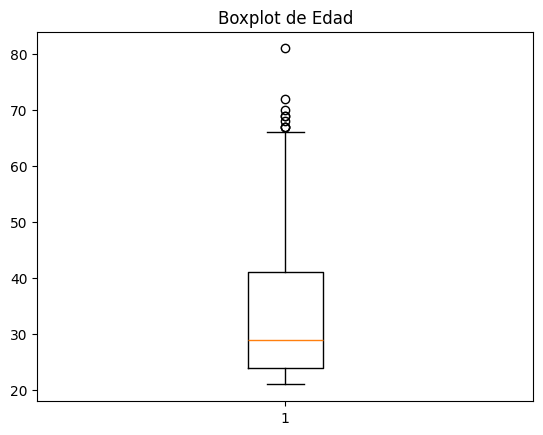

In [69]:
plt.boxplot(diabetes['Age'])
plt.title('Boxplot de Edad')

En este Boxplot se puede identificar que la mediana de edad de la población esta en 29

Text(0.5, 1.0, 'Boxplot de Edad')

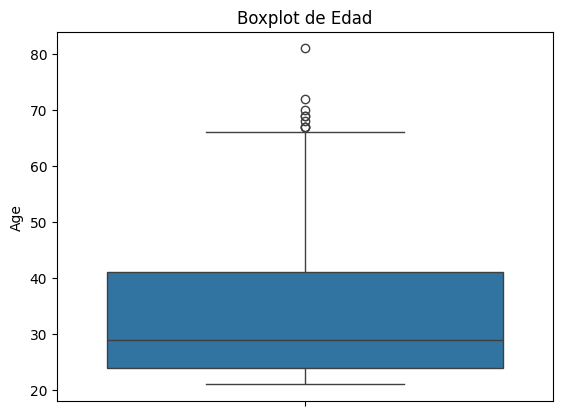

In [70]:
sns.boxplot(diabetes['Age'])
plt.title('Boxplot de Edad')

En este Boxplot se puede identificar que la mediana de edad de la población esta en 29

In [71]:
#mostrar quartiles
q1, mediana, q3 = np.percentile(diabetes['Age'], [25, 50, 75])
print("el 25% de las personas tienen edad debajo de",q1)
print("el 25% de las personas tienen edad arriba de",q3)

el 25% de las personas tienen edad debajo de 24.0
el 25% de las personas tienen edad arriba de 41.0


Text(0.5, 1.0, 'Edad de acuerdo a diabetes positiva y negativa')

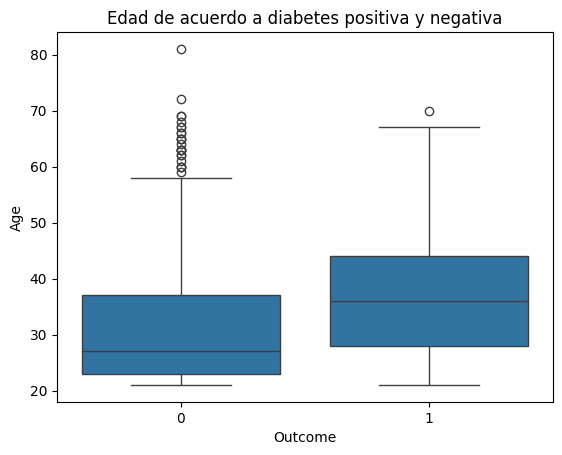

In [77]:
#Boxplot de edad de las personas que dieron negativo a diabetes y las que dieron positivo
sns.boxplot(diabetes, x="Outcome", y="Age")
plt.title("Edad de acuerdo a diabetes positiva y negativa")

En este Boxplot se puede identificar la mediana de la edad de acuerdo a dos grupos de la población estudiada, los que son negativos a diabetes (0)=29 y los que son positivos a diabetes (1)=39.

Text(0.5, 1.0, 'Edad de acuerdo a diabetes positiva y negativa')

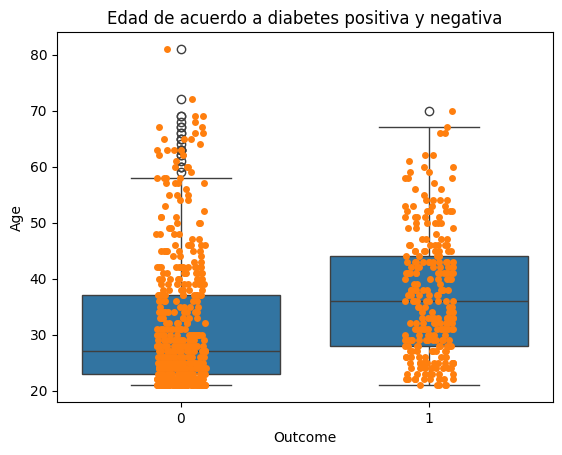

In [78]:
#Boxplot de edad de las personas que dieron negativo a diabetes y las que dieron positivo
sns.boxplot(diabetes, x="Outcome", y="Age")
sns.stripplot(diabetes, x="Outcome", y="Age", edgecolor="auto" )
plt.title("Edad de acuerdo a diabetes positiva y negativa")

En este Boxplot se puede identificar la edad de acuerdo a dos grupos de la población estudiada, los que son negativos a diabetes y los que son positivos a diabetes.

## Matriz de Correlación

In [74]:
#seleccionar variables numéricas
variables_numericas = diabetes.select_dtypes(include='number')
matriz_correlacion = variables_numericas.corr().round(2)
matriz_correlacion

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,diabetes_posible
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22,-0.03
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47,0.54
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07,0.12
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07,0.40
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13,0.97
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29,0.23
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17,0.20
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24,0.03
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00,0.23
diabetes_posible,-0.03,0.54,0.12,0.40,0.97,0.23,0.20,0.03,0.23,1.00


## Mapa de Calor

Text(0.5, 1.0, 'Correlación entre características (Features)"')

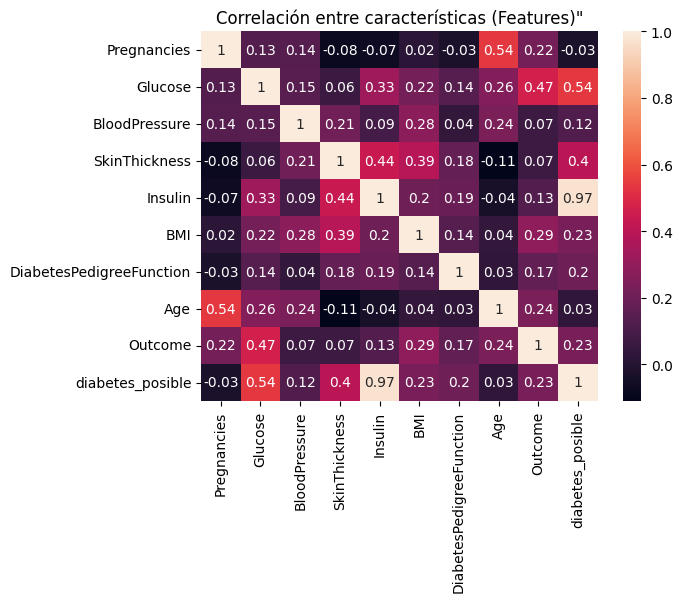

In [75]:
#Mostrar mapa de calor.
sns.heatmap(matriz_correlacion, annot=True)
plt.title('Correlación entre características (Features)"')

En el mapa de calor se puede ver que la variable con más correlaciones es la de Glucosa e Insulina, seguidas por la variable de SkinThickness. Demostrando que aquellos pacientes con estas características son más propensas a tener diabetes, siendo la correlación más fuerte el color más claro y viceversa.

Text(0.5, 1.0, 'Correlación entre características (Features)"')

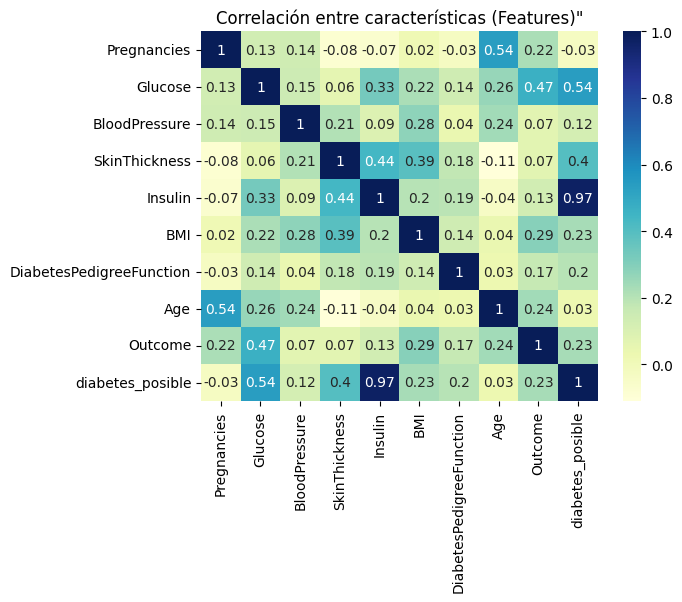

In [76]:
sns.heatmap(matriz_correlacion,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlación entre características (Features)"')

En el mapa de calor se puede ver que la variable con más correlaciones es la de Glucosa e Insulina, seguidas por la variable de SkinThickness. Demostrando que aquellos pacientes con estas características son más propensas a tener diabetes, siendo la correlación más fuerte el color más fuerte y viceversa.

**¿Hay alguna variable que no aporta información?
 Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?**

 La variable que aportó menos información al estudio de la diabetes fue la de embarazos, puesto que demostró tener menos correlaciones con las demás variables de esta enfermedad.

 **Si comparas el rango de las variables (min-max), ¿todas están en rangos similares? Describe sus rangos.**

 El valor mínimo de las variables tiene en su mayoría valores de 0, sin embargo, los valores máximos difieren bastante siendo que no tienen un orden de incremento o valores cercanos.

**¿Existen variables que tengan datos atípicos? Describe cuáles si o no.**

En el Boxplot arrojó que existen datos atípicos dentro de la variable de edad 'Age', de modo que se puede decir que la edad no es una variable definitiva sobre los resultados de diabetes.

**¿Existe correlación alta entre variables? Describe algunas, indicando si es correlación positiva o negativa.**
Dentro de los mapas de calor se puede ver que la variable con la correlación más alta es la variable que se definió dentro del código que es la de 'diabetes_posible', siendo que esta es la suma de dos variables ya proporcionadas y por ende es con estas que la correlación es más alta. 
Excluyendo esta variable se puede observar que otras variables con correlación alta son 'SkinThickness' con  insulina, glucosa con 'outcome' y glucosa con insulina (siendo estas positivas); mientras que la variable con  correlaciones negativas es la de 'Pregnancies'.